# Laptop Price Prediction - Initial Data Exploration

Starting exploration of the laptop dataset for regression task.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the dataset
df = pd.read_csv(r'C:\Users\nicol\CS3410-laptop-price-prediction\data\Laptop Price - Laptop Price.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (1172, 11)


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Linux,2.5kg,52161.120
1,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5kg,14811.840
2,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Linux,2.2kg,14646.672
3,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,16GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.42kg,150462.720
4,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.4kg,23976.000


In [11]:
# Basic info about the dataset
print("Dataset Info:")
df.info()
print("\nColumn names:")
print(df.columns.tolist())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1172 non-null   object 
 1   TypeName          1172 non-null   object 
 2   Inches            1172 non-null   float64
 3   ScreenResolution  1172 non-null   object 
 4   Cpu               1172 non-null   object 
 5   Ram               1172 non-null   object 
 6   Memory            1172 non-null   object 
 7   Gpu               1172 non-null   object 
 8   OpSys             1172 non-null   object 
 9   Weight            1172 non-null   object 
 10  Price             1172 non-null   float64
dtypes: float64(2), object(9)
memory usage: 100.8+ KB

Column names:
['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']


In [12]:
#check for missing values
#Number of missing values in each column of dataset
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])


Series([], dtype: int64)


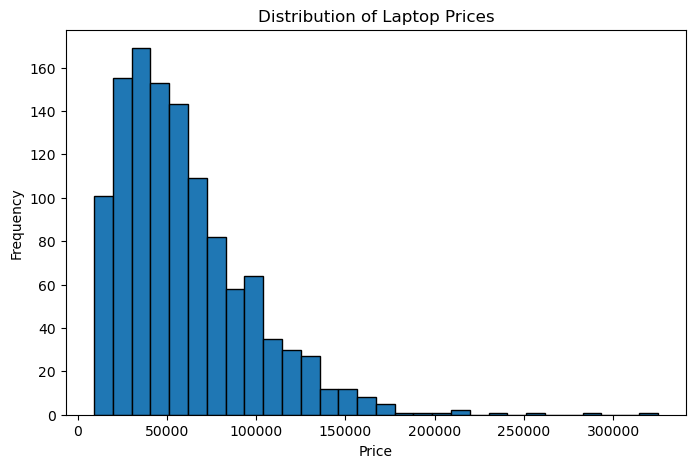

In [13]:
#check laptop price distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["Price"], bins=30, edgecolor='k')
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


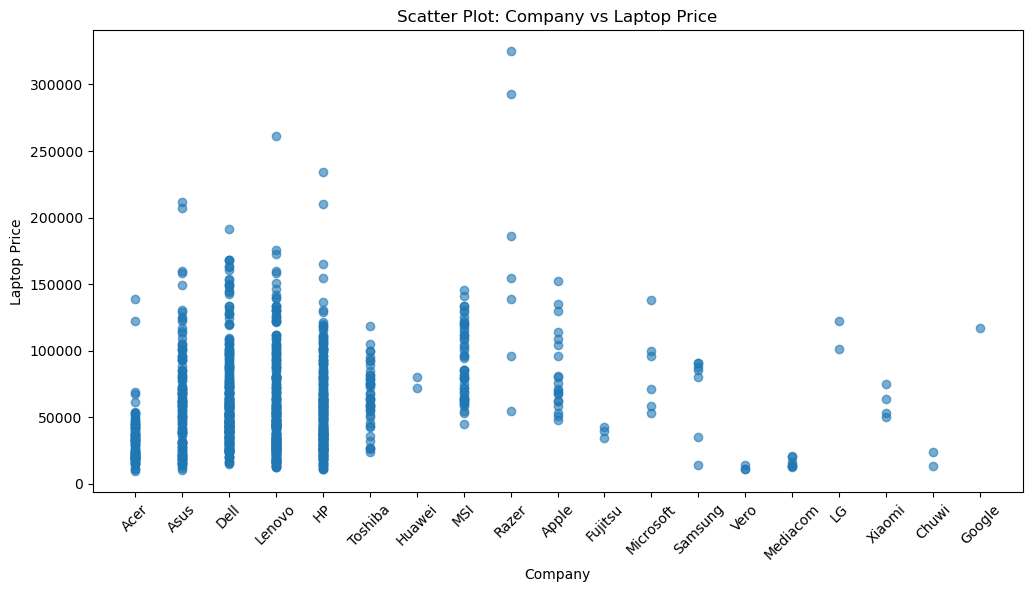

In [14]:
#check laptop price wrt Company name
import matplotlib.pyplot as plt

# Map company names to integers for plotting
company_codes = {c: i for i, c in enumerate(df["Company"].unique())}
df["Company_Code"] = df["Company"].map(company_codes)

plt.figure(figsize=(12,6))
plt.scatter(df["Company_Code"], df["Price"], alpha=0.6)

# Ticks with company names
plt.xticks(list(company_codes.values()), list(company_codes.keys()), rotation=45)
plt.title("Scatter Plot: Company vs Laptop Price")
plt.xlabel("Company")
plt.ylabel("Laptop Price")
plt.show()


In [15]:
#Explore categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Detected categorical columns: {len(categorical_cols)}")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"  - {col:20s}: {unique_count:4d} unique values")
    
print(f"\nNumerical columns: {len(numerical_cols)}")
for col in numerical_cols:
    print(f"  - {col:20s}: range {df[col].min():.1f} - {df[col].max():.1f}")
    




Detected categorical columns: 9
  - Company             :   19 unique values
  - TypeName            :    6 unique values
  - ScreenResolution    :   39 unique values
  - Cpu                 :  111 unique values
  - Ram                 :    9 unique values
  - Memory              :   38 unique values
  - Gpu                 :  100 unique values
  - OpSys               :    9 unique values
  - Weight              :  172 unique values

Numerical columns: 3
  - Inches              : range 10.1 - 17.3
  - Price               : range 9270.7 - 324954.7
  - Company_Code        : range 0.0 - 18.0


In [16]:
#Get the unique categorical variables 

# Basic statistics
total_count = len(df)
print(f"Total entries: {total_count}")

for col in categorical_cols:
    # Basic statistics
    unique_count = df[col].nunique()
    missing_count = df[col].isnull().sum()
    
    print(f"Unique values: {unique_count}")
    print(f"Missing values: {missing_count} ({missing_count/total_count*100:.1f}%)")
    
    # Value counts
    value_counts = df[col].value_counts()
    print(f"\n=== TOP 10 MOST FREQUENT VALUES ===")
    print(value_counts.head(15))
    
    

Total entries: 1172
Unique values: 19
Missing values: 0 (0.0%)

=== TOP 10 MOST FREQUENT VALUES ===
Company
Lenovo       268
Dell         262
HP           253
Asus         138
Acer          95
MSI           49
Toshiba       43
Apple         20
Razer          7
Samsung        7
Mediacom       7
Microsoft      6
Xiaomi         4
Fujitsu        3
Vero           3
Name: count, dtype: int64
Unique values: 6
Missing values: 0 (0.0%)

=== TOP 10 MOST FREQUENT VALUES ===
TypeName
Notebook              660
Gaming                187
Ultrabook             172
2 in 1 Convertible    103
Workstation            27
Netbook                23
Name: count, dtype: int64
Unique values: 39
Missing values: 0 (0.0%)

=== TOP 10 MOST FREQUENT VALUES ===
ScreenResolution
Full HD 1920x1080                                460
1366x768                                         251
IPS Panel Full HD 1920x1080                      216
IPS Panel Full HD / Touchscreen 1920x1080         46
Full HD / Touchscreen 1920x1080 

In [17]:
#Explore Categorical Variables corelation with laptop price
target = 'Price'

for col in categorical_cols:
# Group statistics
    grouped_stats = df.groupby(col)['Price'].agg([
        'count', 'mean', 'median', 'std', 'min', 'max'
    ]).round(2)

 # Sort by mean price
    grouped_stats = grouped_stats.sort_values('mean', ascending=False)
    
    print("-PRICE STATISTICS BY CATEGORY ")
    print(grouped_stats.head(10))
    
# Visualizations
plt.figure(figsize=(20, 12))

-PRICE STATISTICS BY CATEGORY 
           count       mean     median       std        min        max
Company                                                               
Razer          7  178282.49  154458.72  99100.19   54825.12  324954.72
Google         1  117162.72  117162.72       NaN  117162.72  117162.72
LG             2  111834.72  111834.72  15069.86  101178.72  122490.72
MSI           49   91319.79   85194.72  27282.31   44701.92  145401.12
Microsoft      6   85903.79   83622.96  31884.41   52693.92  137941.92
Apple         20   84409.29   73491.50  30286.62   47895.52  152274.24
Huawei         2   75870.72   75870.72   5651.20   71874.72   79866.72
Samsung        7   69058.49   85194.72  31089.71   14332.32   90522.72
Toshiba       43   66150.22   64628.64  22951.47   23816.16  118601.28
Dell         262   63299.28   52986.69  35466.02   14646.67  191211.26
-PRICE STATISTICS BY CATEGORY 
                    count       mean     median       std       min        max
TypeNam

-PRICE STATISTICS BY CATEGORY 
                          count       mean     median       std        min  \
Gpu                                                                          
Nvidia GeForce GTX 1080       5  226823.62  207259.20  78930.61  149130.72   
Nvidia GeForce GTX 980        1  211788.00  211788.00       NaN  211788.00   
Nvidia Quadro M3000M          1  210424.03  210424.03       NaN  210424.03   
Nvidia GeForce GTX 1070M      1  191211.26  191211.26       NaN  191211.26   
Nvidia Quadro M2000M          2  180059.76  180059.76  76065.12  126273.60   
Nvidia Quadro M2200M          3  167618.88  130482.72  81450.07  111355.20   
Nvidia Quadro M620M           1  159786.72  159786.72       NaN  159786.72   
Nvidia GeForce GTX1080        1  158135.04  158135.04       NaN  158135.04   
Nvidia Quadro 3000M           1  158135.04  158135.04       NaN  158135.04   
AMD FirePro W6150M            1  154458.72  154458.72       NaN  154458.72   

                                

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

In [22]:
#compare multiple categorical columns in relation with price

comparison_data = {}
    
for col in categorical_cols:
    if col in df.columns:
        clean_data = df[[col, target]].dropna()
        grouped = clean_data.groupby(col)[target].mean()
            
        comparison_data[col] = {
                'unique_values': df[col].nunique(),
                'price_variance': grouped.var(),
                'price_range': grouped.max() - grouped.min(),
                'max_price_category': grouped.idxmax(),
                'min_price_category': grouped.idxmin(),
                'correlation_strength': grouped.std() / grouped.mean() if grouped.mean() > 0 else 0
            }
# Create comparison DataFrame
comparison_df = pd.DataFrame(comparison_data).T
comparison_df = comparison_df.sort_values('price_variance', ascending=False)
    
print("-CATEGORICAL COLUMNS COMPARISON")
#print(comparison_df.round(2))  
comparison_df.head()


-CATEGORICAL COLUMNS COMPARISON


,unique_values,price_variance,price_range,max_price_category,min_price_category,correlation_strength
Ram,9,4942088420.6385,198569.792842,64GB,2GB,0.764313
Gpu,100,2430485561.557694,210182.496,Nvidia GeForce GTX 1080,AMD Radeon R2,0.672997
Memory,38,2387494632.904561,179258.784,1TB SSD + 1TB HDD,16GB SSD,0.673613
Cpu,111,2129699900.517742,249787.296,Intel Xeon E3-1535M v6 3.1GHz,Intel Atom X5-Z8350 1.44GHz,0.785309
Company,19,1579109029.08017,166317.579429,Razer,Vero,0.581705


In [27]:
# Compare multiple numerical columns in relation with target variable
comparison_data = {}

print(f"Analyzing correlation with target variable: '{target}'")

for col in numerical_cols:
    if col in df.columns and col != target:  # Don't correlate target with itself
        try:
            clean_data = df[[col, target]].dropna()
            
            if len(clean_data) > 1:  # Need at least 2 data points for correlation
                # Calculate correlation safely
                corr_value = clean_data[col].corr(clean_data[target])
                
                # Handle NaN correlations (e.g., when one variable is constant)
                if pd.isna(corr_value):
                    corr_value = 0.0
                
                comparison_data[col] = {
                    'unique_values': clean_data[col].nunique(),
                    'variance': clean_data[col].var(),
                    'range': clean_data[col].max() - clean_data[col].min(),
                    'mean': clean_data[col].mean(),
                    'std': clean_data[col].std(),
                    'correlation': corr_value,
                    'abs_correlation': abs(corr_value)
                }
            else:
                print(f"Warning: Not enough data for column '{col}' (only {len(clean_data)} valid pairs)")
                
        except Exception as e:
            print(f"Error processing column '{col}': {str(e)}")
            continue

# Create and display comparison DataFrame
if comparison_data:
    comparison_df = pd.DataFrame(comparison_data).T
    comparison_df = comparison_df.sort_values('abs_correlation', ascending=False)
    
    print("\nNUMERICAL COLUMNS COMPARISON")
    
    display(comparison_df.round(4))
    
else:
    print("No numerical data available for comparison")

Analyzing correlation with target variable: 'Price'

NUMERICAL COLUMNS COMPARISON


,unique_values,variance,range,mean,std,correlation,abs_correlation
Company_Code,19.0,6.4658,18.0,3.1971,2.5428,0.1512,0.1512
Inches,17.0,1.9954,7.2,15.0434,1.4126,0.0722,0.0722


## TODO:
- Check for missing values
- Analyze target variable distribution
- Explore categorical features
- Look at correlations
- Handle data preprocessing needs